In [1]:
from DataPaths import Paths
from DatasetReader import DatasetReader
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.utils import to_time_series_dataset
import matplotlib.pyplot as plt

import pandas as pd

C:\Users\Mikko\anaconda3\envs\gradu\lib\site-packages\tslearn\bases\bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


In [2]:
dr = DatasetReader()
dr.read_directories(Paths.mean_pickles)

Directories: []
Files: ['means_2016_from_1st_monday_february_3_weeks.pkl', 'means_2017_from_1st_monday_february_3_weeks.pkl', 'means_2020_from_1st_monday_february_3_weeks.pkl', 'means_2021_from_1st_monday_february_3_weeks.pkl']
Full file paths: ['YOUR_PATH\\data\\mean_pickles\\\\means_2016_from_1st_monday_february_3_weeks.pkl', 'YOUR_PATH\\data\\mean_pickles\\\\means_2017_from_1st_monday_february_3_weeks.pkl', 'YOUR_PATH\\data\\mean_pickles\\\\means_2020_from_1st_monday_february_3_weeks.pkl', 'YOUR_PATH\\data\\mean_pickles\\\\means_2021_from_1st_monday_february_3_weeks.pkl']

In [3]:
data_2016 = dr.read_pickle("YOUR_PATH\\data\\mean_pickles\\\\means_2016_from_1st_monday_february_3_weeks.pkl")

In [4]:
dataset_2016 = to_time_series_dataset(data_2016["CarCount"])
scaler = TimeSeriesScalerMeanVariance()

In [5]:
scaled_2016 = scaler.fit_transform(dataset_2016)

In [6]:
kmeans_2016 = TimeSeriesKMeans(5, n_jobs=6, metric="dtw", random_state=1, metric_params={"global_constraint":"sakoe_chiba", "sakoe_chiba_radius":10})
kmeans_2016.fit(scaled_2016[:,:288])

TimeSeriesKMeans(metric='dtw',
                 metric_params={'global_constraint': 'sakoe_chiba',
                                'sakoe_chiba_radius': 10},
                 n_clusters=5, n_jobs=6, random_state=1)

In [7]:
preds = kmeans_2016.predict(scaled_2016[:,:288])

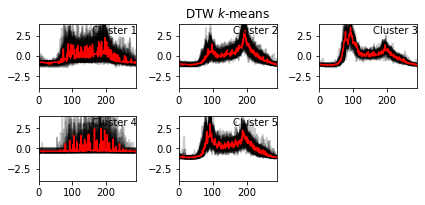

In [8]:
for yi in range(5):
    plt.subplot(3, 3, 1 + yi)
    for xx in scaled_2016[:,:288][preds == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(kmeans_2016.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, 288)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("DTW $k$-means")

plt.tight_layout()
plt.show()

In [6]:
%matplotlib qt
plt.plot(data_2016[data_2016["lamId"]==1303]["CarCount"].values[0][:288], alpha=0.6)
plt.plot(data_2016[data_2016["lamId"]==1303]["CarCount"].values[1][:288], alpha=0.6)

In [7]:
plt.plot(kmeans_2016.cluster_centers_[2].ravel(), "r-")

NameError: name 'kmeans_2016' is not defined

In [8]:
start_day = 5
kmeans_2016_unscaled = TimeSeriesKMeans(6, n_jobs=6, metric="dtw", random_state=1, metric_params={"global_constraint":"sakoe_chiba", "sakoe_chiba_radius":2*12})
kmeans_2016_unscaled.fit(dataset_2016[:,288*start_day:288*(start_day+1)])
unscaled_preds = kmeans_2016_unscaled.predict(dataset_2016[:,288*start_day:288*(start_day+1)])

In [9]:
for yi in range(6):
    plt.subplot(3, 3, 1 + yi)
    for xx in dataset_2016[:,288*start_day:288*(start_day+1)][unscaled_preds == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(kmeans_2016_unscaled.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, 288)
    plt.ylim(-4, 270)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("DTW $k$-means")

plt.tight_layout()
plt.show()

In [10]:
# kmeans_2016_unscaled_week = TimeSeriesKMeans(9, n_jobs=6, metric="dtw", random_state=1, metric_params={"global_constraint":"sakoe_chiba", "sakoe_chiba_radius":10})
# kmeans_2016_unscaled_week.fit(dataset_2016)
# unscaled_week_preds = kmeans_2016_unscaled_week.predict(dataset_2016)

In [11]:
reshaped = unscaled_preds.reshape((int(698/2), 2))

In [12]:
class_pairs = []
counts = []

for pair in reshaped:
  pair_set = set(pair)
  try:
    i = class_pairs.index(pair_set)
    counts[i] += 1
  except:
    class_pairs.append(pair_set)
    counts.append(1)


In [13]:
class_pairs

[{2},
 {4},
 {5},
 {1},
 {0},
 {2, 4},
 {3},
 {1, 4},
 {0, 5},
 {4, 5},
 {0, 2},
 {2, 5},
 {1, 3}]

In [14]:
counts

[61, 43, 96, 30, 70, 5, 7, 7, 11, 2, 14, 2, 1]

In [15]:
exclude = []
log = []

In [16]:
for j in range(len(counts)):
  highest = 0
  highest_i = 0

  for i in range(len(counts)):
    c = counts[i]
    if c > highest and i not in exclude:
      highest = c
      highest_i = i
  exclude.append(highest_i)
  log.append(f"{highest} lams with pair {class_pairs[highest_i]}")


In [17]:
for l in log:
  print(l)

96 lams with pair {5}
70 lams with pair {0}
61 lams with pair {2}
43 lams with pair {4}
30 lams with pair {1}
14 lams with pair {0, 2}
11 lams with pair {0, 5}
7 lams with pair {3}
7 lams with pair {1, 4}
5 lams with pair {2, 4}
2 lams with pair {4, 5}
2 lams with pair {2, 5}
1 lams with pair {1, 3}


In [18]:
from collections import Counter
import numpy as np

In [19]:
class_counts = Counter(unscaled_preds)

In [20]:
class_counts

Counter({2: 143, 4: 100, 5: 207, 1: 68, 0: 165, 3: 15})

In [21]:
halfhour_summed = data_2016.CarCount.apply(lambda x: np.sum(x.reshape(-1, 6), axis=1))

In [22]:
halfhour_summed[0].shape

(336,)

In [23]:
halfhour = to_time_series_dataset(halfhour_summed)
scaler = TimeSeriesScalerMeanVariance()
scaled_halfhour = scaler.fit_transform(halfhour)

In [24]:
kmeans_halfhour = TimeSeriesKMeans(12, n_jobs=6, metric="dtw", random_state=1, metric_params={"global_constraint":"sakoe_chiba", "sakoe_chiba_radius":5})
kmeans_halfhour.fit(halfhour)
halfhour_preds = kmeans_halfhour.predict(halfhour)

In [25]:
for yi in range(12):
    plt.subplot(4, 3, 1 + yi)
    for xx in halfhour[halfhour_preds == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(kmeans_halfhour.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, 336)
    plt.ylim(-2, 6*256)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("DTW $k$-means")

plt.tight_layout()
plt.show()

In [26]:
kmeans_halfhour_scaled = TimeSeriesKMeans(12, n_jobs=6, metric="dtw", random_state=1, metric_params={"global_constraint":"sakoe_chiba", "sakoe_chiba_radius":5})
kmeans_halfhour_scaled.fit(scaled_halfhour)
halfhour_preds_scaled = kmeans_halfhour_scaled.predict(scaled_halfhour)

In [28]:
for yi in range(12):
    plt.subplot(4, 3, 1 + yi)
    for xx in scaled_halfhour[halfhour_preds_scaled == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(kmeans_halfhour_scaled.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, 336)
    plt.ylim(-2, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("DTW $k$-means")

plt.tight_layout()
plt.show()

In [29]:
data_2016[data_2016["lamId"]==1303]

,lamId,year,startDay,weeksInMean,direction,CarCount
598,1303,2016,32,3,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
599,1303,2016,32,3,2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [33]:
plt.plot(halfhour_summed[598])

In [40]:
halfhour_summed.apply(lambda x: x.max() > 10)

46

In [62]:
halfhour_small_removed = halfhour_summed[halfhour_summed.apply(lambda x: x.max() > 15)]
halfhour_small_removed_scaled = scaler.fit_transform(to_time_series_dataset(halfhour_small_removed.reset_index()["CarCount"]))

In [63]:
kmeans_halfhour_scaled_without_small = TimeSeriesKMeans(12, n_jobs=6, metric="dtw", random_state=1, metric_params={"global_constraint":"sakoe_chiba", "sakoe_chiba_radius":5})
kmeans_halfhour_scaled_without_small.fit(halfhour_small_removed_scaled)
halfhour_preds_scaled_without_small = kmeans_halfhour_scaled_without_small.predict(halfhour_small_removed_scaled)

In [64]:
for yi in range(12):
    plt.subplot(4, 3, 1 + yi)
    for xx in halfhour_small_removed_scaled[halfhour_preds_scaled_without_small == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(kmeans_halfhour_scaled_without_small.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, 336)
    plt.ylim(-2, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("DTW $k$-means")

plt.tight_layout()
plt.show()

In [65]:
asd = to_time_series_dataset(halfhour_summed)#[halfhour_summed.apply(lambda x: x.max() > 15)]

In [67]:
#halfhour_small_removed = halfhour_summed[halfhour_summed.apply(lambda x: x.max() > 15)]
asd.max()

1402.0